In [70]:
# Project: Working with UK crime data available on https://data.police.uk/data/
# The above website enables to download csv files that provide street-level crime for the selected date range.
# For each selected month, separate file is generated. Downloaded data used in this project includes:
# - crime type
# - month and year in which the crime occured
# - longitude and latitude of the crime event
# - UK counties name in which the crime occured

# The purpose of the code below is to count the amounts of crime occured in August 2021 in West Midlands in UK for each county 
# and each crime type. 
# Shapefile with Local Planning Authorities Boudaries for UK was downloaded from https://geoportal.statistics.gov.uk/ in order to
# calculate the amounts of crime that occured in each county. 
# Results are presented on interactive map and plot.

# Based on the given example of processing crime data for West Midland, function was created to enable to quickly create DataFrame with 
# calculated amount of crime per each West Midlands county for the downloaded csv file for selected month and year.

# **Extension in progress: extend the function to enable the user to select the counties and upload population data in order to calculate
#   crime rate and show the results on interactive map.

In [1]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
import pathlib
NOTEBOOK_PATH = pathlib.Path().resolve()
DATA_DIRECTORY = NOTEBOOK_PATH/ "Documents"/ "Automating GIS Process 2022" / "UK_crime"

In [2]:
# Uploading crime data for West Midlands in UK for August 2021
west_midlands = pd.read_csv(DATA_DIRECTORY / "2021-08_UK_Crime" / "2021-08-west-midlands-street.csv")

In [3]:
west_midlands.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,dbf4a049e8c0ab606aac410933d660e7197b07cc26eb40...,2021-08,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham 001A,Criminal damage and arson,Investigation complete; no suspect identified,NaN
1,105409aa1b281e75d70eb363ec1a0959adfe00132ddb1f...,2021-08,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham 001A,Violence and sexual offences,Investigation complete; no suspect identified,NaN
2,2ef72cbb7bb6a29a39908f3a2b87fa3183b283ebe9b50d...,2021-08,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham 001A,Violence and sexual offences,Unable to prosecute suspect,NaN
3,NaN,2021-08,West Midlands Police,West Midlands Police,-1.840641,52.598270,On or near Badgers Bank Road,E01009418,Birmingham 001B,Anti-social behaviour,NaN,NaN
4,f868235a5b0c5ea5229662098d5e7d829e7c3d8d96d220...,2021-08,West Midlands Police,West Midlands Police,-1.839063,52.597809,On or near Byron Court,E01009418,Birmingham 001B,Criminal damage and arson,Investigation complete; no suspect identified,NaN


In [4]:
# Creating GeoDataFrame:
west_midlands_gdf = geopandas.GeoDataFrame(west_midlands, geometry=geopandas.points_from_xy(west_midlands.Longitude, west_midlands.Latitude), crs="EPSG:4326")

<Axes: >

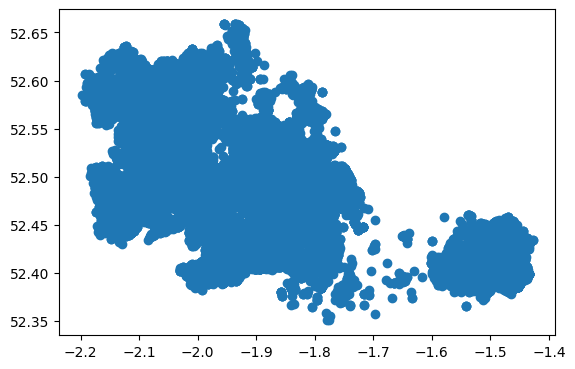

In [5]:
west_midlands_gdf.plot()

In [6]:
# Exploring data: checking crime type categories
west_midlands["Crime type"].unique()

array(['Criminal damage and arson', 'Violence and sexual offences',
       'Anti-social behaviour', 'Possession of weapons', 'Vehicle crime',
       'Other theft', 'Burglary', 'Public order', 'Robbery',
       'Shoplifting', 'Bicycle theft', 'Other crime',
       'Theft from the person', 'Drugs'], dtype=object)

In [7]:
# Uploading vector boundaries for Local Planning Authorities in the United Kingdom
boundaries = geopandas.read_file(DATA_DIRECTORY / "LPA_2023_UK_BUC.shp")

In [8]:
boundaries.head()

,LPA23CD,LPA23NM,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
0,E60000001,County Durham LPA,410381,532242,-1.84050,54.6851,8d3621e1-6c43-48f2-9110-544252d9cd2b,"POLYGON ((428366.003 554230.403, 428216.504 55..."
1,E60000002,Darlington LPA,428029,515648,-1.56835,54.5353,6b137015-6c2b-46ae-90ef-c56fe6a2397d,"POLYGON ((436388.002 522354.197, 436839.197 52..."
2,E60000003,Hartlepool LPA,447160,531474,-1.27018,54.6761,54d71b1b-82bf-4cb0-933e-d7be38cf46e1,"POLYGON ((448906.042 536703.720, 448926.003 53..."
3,E60000004,Middlesbrough LPA,451141,516887,-1.21099,54.5447,3833c65d-077a-47dc-9aba-657617efd646,"POLYGON ((451894.299 521145.303, 452174.104 52..."
4,E60000005,Northumberland LPA,397860,571351,-2.03502,55.0367,b6b34a1f-ca5a-4acf-b395-a14086bba5ad,"MULTIPOLYGON (((371658.219 587313.999, 371779...."


In [9]:
# Selecting LPA within West Midlands
west_mid_boundaries = boundaries.loc[boundaries["LPA23NM"].str.contains("Solihull|Coventry|Birmingham|Sandwell|Dudley|Wolverhampton|Walsall", case=False)]

<Axes: >

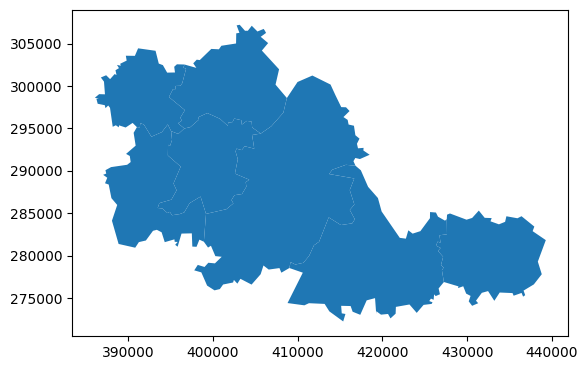

In [10]:
west_mid_boundaries.plot()

In [11]:
west_mid_boundaries.head()

,LPA23CD,LPA23NM,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
109,E60000130,Birmingham LPA,408150,287352,-1.88141,52.4840,97ba2864-4c17-4b41-85fe-523422a18565,"POLYGON ((414453.996 298914.696, 415141.403 29..."
110,E60000131,Coventry LPA,432807,279689,-1.51908,52.4142,74c8003b-a8e8-4a61-a893-eed2ac62e40c,"POLYGON ((436855.901 284269.398, 437909.397 28..."
111,E60000132,Dudley LPA,393191,288584,-2.10171,52.4951,1c49c89a-4da7-42c6-a739-4c74938cea17,"POLYGON ((395082.802 294671.201, 395189.196 29..."
112,E60000133,Sandwell LPA,399573,290764,-2.00771,52.5148,ab486266-795b-4ccd-8e71-3095538cc5e0,"POLYGON ((405646.597 294385.502, 404630.096 29..."
113,E60000134,Solihull LPA,419434,281483,-1.71558,52.4310,31f0c9fd-2c1e-49d4-8f27-6c12bfa5e111,"POLYGON ((416823.701 290591.099, 417453.797 29..."


In [12]:
# Uploading population data for selected counties recorded in 2021 
population = pd.read_csv(DATA_DIRECTORY / "population_2021.csv")

In [13]:
population.head()

,GEO (Codes),GEO (Labels),2021
0,UKG31,Birmingham LPA,1142494
1,UKG32,Solihull LPA,216666
2,UKG33,Coventry LPA,343320
3,UKG36,Dudley LPA,323581
4,UKG37,Sandwell LPA,341729


In [14]:
# Checking CRS
print(west_midlands_gdf.crs) 
print(west_mid_boundaries.crs)

EPSG:4326
EPSG:27700


In [15]:
# Changing crs to EPSG:27700
west_midlands_gdf = west_midlands_gdf.to_crs(west_mid_boundaries.crs)

In [42]:
# Count points (crime events) in polygons (West Midlands counties)

crime_in_counties = (
# Spatial join to associate points and polygons that intersects each other
    west_mid_boundaries.sjoin(
        west_midlands_gdf,
        how="inner",  # Only keep points that matches a polygon
    )
    .groupby("LPA23NM")  # Group points by county name
    .size()  # Get number of points
    .rename("crimes_amount")
)

In [17]:
crime_in_counties.head()

LPA23NM
Birmingham LPA    14145
Coventry LPA       3776
Dudley LPA         2912
Sandwell LPA       3473
Solihull LPA       1663
Name: crimes_amount, dtype: int64

In [18]:
crime_in_counties_df = crime_in_counties.to_frame()

In [19]:
# Converting boundaries from GeoDataFrame to DataFrame to merge boundaries' geometry information with counted crimes per each county
west_mid_boundaries_df = pd.DataFrame(west_mid_boundaries)

In [20]:
west_mid_boundaries_df.head()

,LPA23CD,LPA23NM,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
109,E60000130,Birmingham LPA,408150,287352,-1.88141,52.4840,97ba2864-4c17-4b41-85fe-523422a18565,"POLYGON ((414453.996 298914.696, 415141.403 29..."
110,E60000131,Coventry LPA,432807,279689,-1.51908,52.4142,74c8003b-a8e8-4a61-a893-eed2ac62e40c,"POLYGON ((436855.901 284269.398, 437909.397 28..."
111,E60000132,Dudley LPA,393191,288584,-2.10171,52.4951,1c49c89a-4da7-42c6-a739-4c74938cea17,"POLYGON ((395082.802 294671.201, 395189.196 29..."
112,E60000133,Sandwell LPA,399573,290764,-2.00771,52.5148,ab486266-795b-4ccd-8e71-3095538cc5e0,"POLYGON ((405646.597 294385.502, 404630.096 29..."
113,E60000134,Solihull LPA,419434,281483,-1.71558,52.4310,31f0c9fd-2c1e-49d4-8f27-6c12bfa5e111,"POLYGON ((416823.701 290591.099, 417453.797 29..."


In [21]:
crime_in_counties_df.head()

,crimes_amount
LPA23NM,
Birmingham LPA,14145
Coventry LPA,3776
Dudley LPA,2912
Sandwell LPA,3473
Solihull LPA,1663


In [22]:
# Merging two DataFrames to add new_column with calculated crimes within each county and counties' geometry
data_merge_df = pd.merge(
    west_mid_boundaries_df,
    crime_in_counties_df,
    on="LPA23NM",
    how="left")

# Merging with population DataFrame to calculate crime within counties per 1,000 people
population = population.rename(columns={"GEO (Labels)":"LPA23NM","2021":"Population2021"})

crime_rate_df= pd.merge(
    data_merge_df,
    population,
    on="LPA23NM",
    how="left")

# Adding new column with calculated crime rate per 1,000 people in August 2021
crime_rate_df["crime_rate"]= round(((crime_rate_df["crimes_amount"]/crime_rate_df["Population2021"])*1000),1)

In [23]:
crime_rate_df.head(7)

,LPA23CD,LPA23NM,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry,crimes_amount,GEO (Codes),Population2021,crime_rate
0,E60000130,Birmingham LPA,408150,287352,-1.88141,52.4840,97ba2864-4c17-4b41-85fe-523422a18565,"POLYGON ((414453.996 298914.696, 415141.403 29...",14145,UKG31,1142494,12.4
1,E60000131,Coventry LPA,432807,279689,-1.51908,52.4142,74c8003b-a8e8-4a61-a893-eed2ac62e40c,"POLYGON ((436855.901 284269.398, 437909.397 28...",3776,UKG33,343320,11.0
2,E60000132,Dudley LPA,393191,288584,-2.10171,52.4951,1c49c89a-4da7-42c6-a739-4c74938cea17,"POLYGON ((395082.802 294671.201, 395189.196 29...",2912,UKG36,323581,9.0
3,E60000133,Sandwell LPA,399573,290764,-2.00771,52.5148,ab486266-795b-4ccd-8e71-3095538cc5e0,"POLYGON ((405646.597 294385.502, 404630.096 29...",3473,UKG37,341729,10.2
4,E60000134,Solihull LPA,419434,281483,-1.71558,52.4310,31f0c9fd-2c1e-49d4-8f27-6c12bfa5e111,"POLYGON ((416823.701 290591.099, 417453.797 29...",1663,UKG32,216666,7.7
5,E60000135,Walsall LPA,402098,300804,-1.97044,52.6050,f176536e-e282-464d-8ee8-b39a9ebdf687,"POLYGON ((408730.901 298576.703, 408316.999 29...",2882,UKG38,284306,10.1
6,E60000136,Wolverhampton LPA,391463,300016,-2.12746,52.5979,bf575659-e10b-4b83-8445-643b13d30f0c,"POLYGON ((396663.100 302527.902, 396525.300 30...",3206,UKG39,264036,12.1


In [24]:
#Creating GeoDataFrame to present the results on interactive map
crime_rate_gdf = geopandas.GeoDataFrame(crime_rate_df, crs="EPSG:27700",geometry="geometry")

In [25]:
import folium

crime_rate_map = crime_rate_gdf.explore(
    column="crime_rate",
    cmap="YlOrRd",
    scheme="naturalbreaks",
    k=5,
    legend=True,
    legend_kwds=dict(colorbar=False,
                     caption="Number of crimes recorded per 1,000 people (August 2021, West Midlands)",
                     labels=["0.0 - 7.7","7.8 - 9.0","9.1 - 10.2","10.3 - 11.0","11.1 - 13.0"]),
    style_kwds=dict(color="black", weight=0.8, opacity=0.8),
    tooltip=False,  # hide tooltip
    popup=["LPA23NM", "crime_rate","crimes_amount","Population2021"],  # show popup (on-click)
    name="crime rate August 2021, West Midlands",  # name of the layer in the map
)

folium.TileLayer("CartoDB positron", show=False).add_to(
    crime_rate_map
)  # add alternative tiles
folium.LayerControl().add_to(crime_rate_map)  # add layer control

crime_rate_map

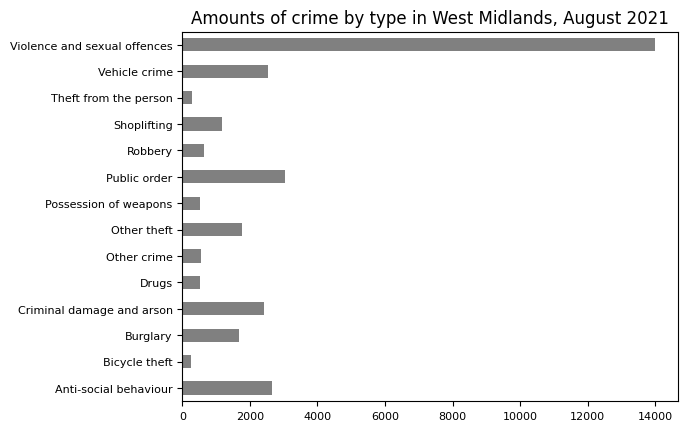

In [26]:
# Counting crime events in West Midlands by crime type

crime_by_type = west_midlands.groupby(["Crime type"]).size().rename("amounts of crime")
crime_by_type_df = crime_by_type.to_frame()

# Plotting data
crime_by_type_df.plot.barh(legend=False, fontsize=8, color='grey')

plt.title("Amounts of crime by type in West Midlands, August 2021", fontsize=12)
plt.ylabel(None)
plt.style.use('ggplot')

In [58]:
#Automate csv file processing to extract amounts of crime per counties as DataFrame

def count_crime(file):  
    data = pd.read_csv(DATA_DIRECTORY / file)
    data_gdf = geopandas.GeoDataFrame(data, geometry=geopandas.points_from_xy(data.Longitude, data.Latitude), crs="EPSG:4326")
    data_gdf = data_gdf.to_crs(west_mid_boundaries.crs)
    
    crime_in_counties = (
        west_mid_boundaries.sjoin(
            data_gdf,
            how="inner",
        )
        .groupby("LPA23NM")
        .size()  # Get number of points
        .rename("crimes_amount")
    )
    crime_in_counties_df = crime_in_counties.to_frame()
    return crime_in_counties_df


In [55]:
Jan = count_crime("2021-01-west-midlands-street.csv")
#Feb = count_crime("2021-02-west-midlands-street.csv")
#Mar = count_crime("2021-03-west-midlands-street.csv")
#Apr = count_crime("2021-04-west-midlands-street.csv")
#May = count_crime("2021-05-west-midlands-street.csv")
#Jun = count_crime("2021-06-west-midlands-street.csv")
#Jul = count_crime("2021-07-west-midlands-street.csv")
#Aug = count_crime("2021-08-west-midlands-street.csv")
#Sep = count_crime("2021-09-west-midlands-street.csv")
#Oct = count_crime("2021-10-west-midlands-street.csv")
#Nov = count_crime("2021-11-west-midlands-street.csv")
#Dec = count_crime("2021-12-west-midlands-street.csv")

In [61]:
# Extension - select the boundaries
# Automate csv file processing to extract amounts of crime per selected counties as DataFrame

def count_crime(UK_crime_file, boundaries_file):  
    data = pd.read_csv(DATA_DIRECTORY / UK_crime_file)
    data_gdf = geopandas.GeoDataFrame(data, geometry=geopandas.points_from_xy(data.Longitude, data.Latitude), crs="EPSG:4326")
    
    # Selecting shapefile with boundaries
    boundaries = geopandas.read_file(DATA_DIRECTORY / boundaries_file)
    # Selecting counties in West Midlands
    selected_boundaries = boundaries.loc[boundaries["LPA23NM"].str.contains("Solihull|Coventry|Birmingham|Sandwell|Dudley|Wolverhampton|Walsall", case=False)]
    # Defining common CRS  
    data_gdf = data_gdf.to_crs(selected_boundaries.crs)
    
    crime_in_counties = (
        selected_boundaries.sjoin(
            data_gdf,
            how="inner",
        )
        .groupby("LPA23NM")
        .size()  # Get number of points
        .rename("crimes_amount")
    )
    crime_in_counties_df = crime_in_counties.to_frame()
    return crime_in_counties_df


In [62]:
January = count_crime("2021-01-west-midlands-street.csv","LPA_2023_UK_BUC.shp")

In [63]:
January

,crimes_amount
LPA23NM,
Birmingham LPA,12874
Coventry LPA,3235
Dudley LPA,2449
Sandwell LPA,3241
Solihull LPA,1654
Walsall LPA,2799
Wolverhampton LPA,2761
